## TIAS Afternoon assignment

This is the final assignment of today, you have 90 minutes to complete it.
No programming experience is necessary, just look very carefully where you copy and paste variable names.
The goal of this assignment is to go through one project from the beginning to the end: loading data, assesing data, EDA, feature extraction, model selection and prediction. To complete the project just follow the steps and use your own creativity.
You are allowed to use the internet if you can't recall certain topics. Of course you are also free to ask us :-).
Please prepare one or two slides with your findings and results.

Good Luck!



-------------------------------------------------------------------------------------------------------------------------------

Import the tools you need, just hit CTRL + ENTER

-------------------------------------------------------------------------------------------------------------------------------

In [103]:
#import the right libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn as sk
import numpy as np
from sklearn import metrics
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

-------------------------------------------------------------------------------------------------------------------------------

Import the data and take a good look at the summary

In [104]:
#Load data from example datasets SK learn
from sklearn.datasets import load_wine
loaddata = load_wine()

In [105]:
#how does the data look like
print(loaddata['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

-------------------------------------------------------------------------------------------------------------------------------

Assignment: What is the data about, write down your findings. And what do we actually want to predict?

-------------------------------------------------------------------------------------------------------------------------------

Load the data into a dataframe, and have a visual inspection with the  .head function.

In [106]:
#Dataframes are great for organizing your data.
#load all data into a dataframe
dfdata = pd.DataFrame(data=loaddata['data'],columns=loaddata['feature_names'])
dfdata['target']=loaddata['target']
dfdata['class']=dfdata['target'].map(lambda ind: loaddata['target_names'][ind])

In [107]:
dfdata.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


-------------------------------------------------------------------------------------------------------------------------------

Rememeber that Pandas has a really great functions to summarize your data, its the . describe function.
Have a look!

In [108]:
#Pandas has a really great function called describe.
dfdata.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


-------------------------------------------------------------------------------------------------------------------------------

Assignment: what do you see in describe, please write it down.

-------------------------------------------------------------------------------------------------------------------------------

Time for some EDA, below you find a list of all variables. Please play with these by assigning them to the variables: Yg and Xg.

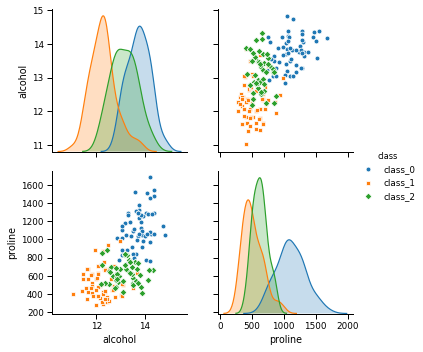

In [109]:
'''
alcohol
malic_acid
ash
alcalinity_of_ash
magnesium
total_phenols
flavanoids
nonflavanoid_phenols
proanthocyanins
color_intensity
hue
od280/od315_of_diluted_wines
proline
'''

Yg="alcohol"
Xg="proline"

sn.pairplot(dfdata, vars=[Yg,Xg], hue = 'class', markers=["o", "s", "D"])

--------------------------------------------------------------------------------------------------------------------------------

With the help of EDA you have increase your knowledge about the dataset. Time to look at the variables in more detail.
Below you can run a correlation plot, good luck

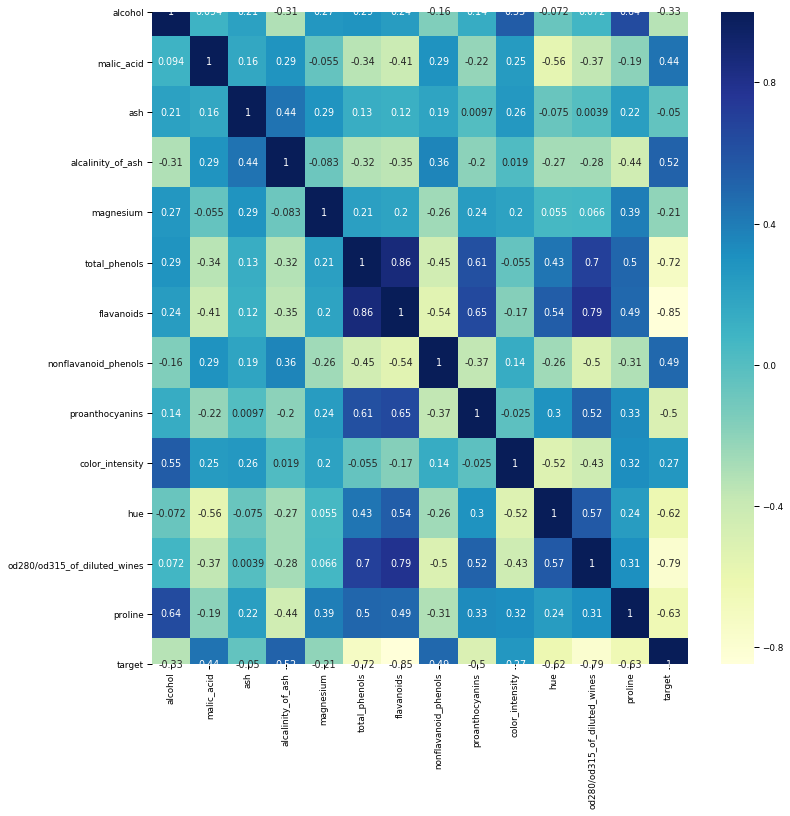

In [110]:
#lets investigate if there are meaningfull correlations
plt.figure(figsize=(12, 12))
corr = dfdata[dfdata.columns].corr()
sn.heatmap(corr, cmap="YlGnBu", annot = True)

--------------------------------------------------------------------------------------------------------------------------------

Assignment: what do you see here, write it down as we did earlier.

--------------------------------------------------------------------------------------------------------------------------------

The next step in the project is to do feature selection. Which features do you want to incorporate in the models. Please indicate below. Pay Attention, there should be a reason why you want to include them! The first piece of code creates a y and X matrix. Don't forget to run it!

In [111]:
#don't forget to run this piece!
dffeat = dfdata.copy() 
dffeat = dffeat.drop(['target','class'],axis=1) 

dftarget = dfdata.copy() #copy the dataframe from dfdata
dftarget = dftarget.loc[:, ['target']]

#Make an Y & X
y =  dftarget[['target']].values.ravel()
X =  dffeat

In [243]:
#please indicate which features you want to have an your dataset.

'''
'alcohol'
'malic_acid'
'ash'
'alcalinity_of_ash'
'magnesium'
'total_phenols'
'flavanoids'
'nonflavanoid_phenols'
'proanthocyanins'
'color_intensity'
'hue'
'od280/od315_of_diluted_wines'
'proline'
'''

#just add the variables as shown below, if you are done, hit CTRL-ENTER

X= dffeat[['alcohol','malic_acid']]



-------------------------------------------------------------------------------------------------------------------------------

Assignment: why did you pick these variables, write it down.

--------------------------------------------------------------------------------------------------------------------------------

Before we can proceed with training the model, you have to define which test/training ratio we need.

In [244]:
#train/test split

test_ratio = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=1)

--------------------------------------------------------------------------------------------------------------------------------

The next step is to define which metric you want to use. Remember the slides about the metrics. Maybe you should have a look the the graph below.

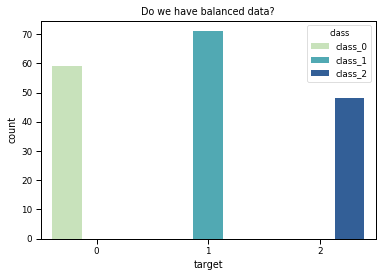

In [245]:
#We will do a classification task, an important part of EDA assesing of we have balanced classes.
sn.set_context('paper')

# create plot
sn.countplot(x = 'target', hue = 'class', data = dfdata, palette = 'YlGnBu')
plt.title('Do we have balanced data?')
plt.show()

--------------------------------------------------------------------------------------------------------------------------------

So what metric should we use, you pick:  

In [246]:
recall_score     = 'yes'
precision_score  = 'no'
accuracy_score   = 'no'

'..............................................................................................................................'
#do not change anything below the red dotted line

if recall_score == 'yes':
    measure = metrics.recall_score
    print('The metric you have chosen is recall.')

elif precision_score == 'yes':
    measure = metrics.precision_score
    print('The metric you have chosen is precision.')

elif accuracy_score == 'yes':
    measure = metrics.accuracy_score
    print('The metric you have chosen is accuracy.')

else: 
    'Pick a metric'


The metric you have chosen is recall.


-------------------------------------------------------------------------------------------------------------------------------

Now its modelling time! 

Below you can indicate which model you want to train, the choice you can make is:

-Logistic regression

-Decision tree classifier 

-Random Forrest classifier


In [247]:
#You can only put one model on yes, this is not a fishing expedition.

logistic_regression = 'no'
random_forrest      = 'no'
decision_tree       = 'yes'

'..............................................................................................................................'
#do not change anything below the red dotted line

if random_forrest == 'yes':
    rf=RandomForestClassifier(random_state=120)
    rf.fit(X_train,y_train)
    y_pred=rf.predict(X_test)
    print('You picked a Random Forrest classifier')

elif decision_tree == 'yes':
    dt=tree.DecisionTreeClassifier(random_state=120)
    dt.fit(X_train,y_train)
    y_pred=dt.predict(X_test)
    print('You picked a Decision Tree classifier')
    
elif logistic_regression == 'yes':
    lr=LogisticRegression(random_state=120)
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    print('You picked a Logistic Regression classifier')
    
else:
    print('You picked no model')

You picked a Decision Tree classifier


-------------------------------------------------------------------------------------------------------------------------------

Assignment: Why did you pick the model you have chosen?

-------------------------------------------------------------------------------------------------------------------------------

Judgement Time!

How well does your model preform on the test set? Hit CTRL + ENTER to see.

In [248]:
#do not change anything below the red dotted line
'..............................................................................................................................'

if logistic_regression == 'yes':
    print('')
    if recall_score == 'yes':
        lrr = metrics.recall_score(y_test, y_pred, average='weighted') *100
        print("Logistic Regression recall:",lrr.round(2),'%')
    elif accuracy_score ==  'yes':
        lra = metrics.accuracy_score(y_test, y_pred) *100
        print("Logistic Regression accuracy:",lra.round(2),'%')
    elif precision_score == 'yes':
        lrp = metrics.precision_score(y_test, y_pred,average = 'weighted') *100
        print("Logistic Regression precision:",lrp.round(2),'%')
    else:
        print('error')
        

elif random_forrest == 'yes':
    print('')
    if recall_score == 'yes':
        rfr = metrics.recall_score(y_test, y_pred, average='weighted') *100
        print("Random Forrest recall:",rfr.round(2),'%')
    elif accuracy_score ==  'yes':
        rfa = metrics.accuracy_score(y_test, y_pred) *100
        print("Random Forrest accuracy:",rfa.round(2),'%')
    elif precision_score == 'yes':
        rfp = metrics.precision_score(y_test, y_pred,average = 'weighted') *100
        print("Random Forrest precision:",rfp.round(2),'%')
    else:
        print('error')
        
elif decision_tree == 'yes':
    print('')
    if recall_score == 'yes':
        dtr = metrics.recall_score(y_test, y_pred, average='weighted') *100
        print("Decision Tree recall:",dtr.round(2),'%')
    elif accuracy_score ==  'yes':
        dta = metrics.accuracy_score(y_test, y_pred) *100
        print("Decision Tree accuracy:",dta.round(2),'%')
    elif precision_score == 'yes':
        dtp = metrics.precision_score(y_test, y_pred,average = 'weighted') *100
        print("Decision Tree precision:",dtp.round(2),'%')
    else:
        print('error')             

else:
    print('ERROR')


Decision Tree recall: 79.63 %


--------------------------------------------------------------------------------------------------------------------------------

And now make this prediction visual. You can increase or decrease the amount of columns in the graph by adjusting the variable below.

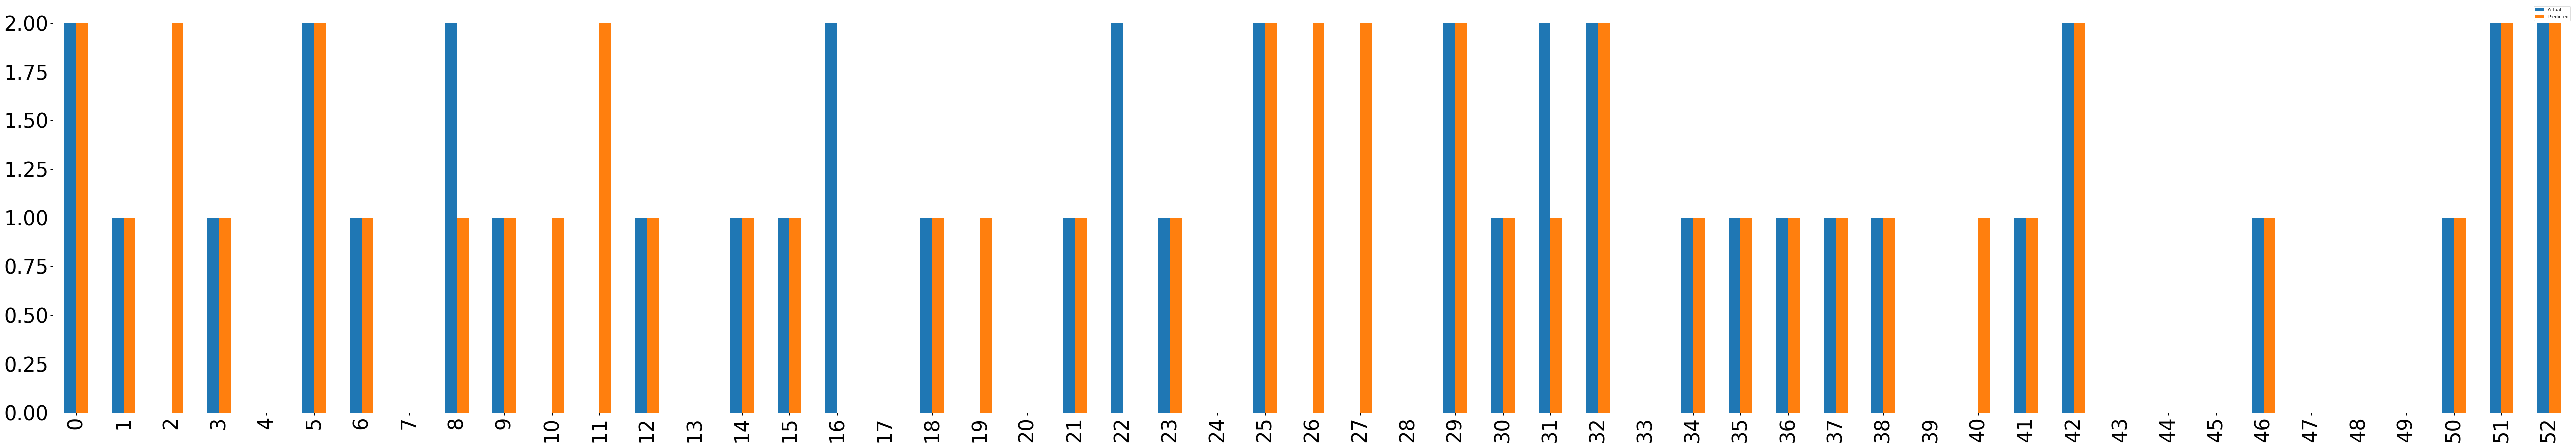

In [249]:
#See what the model predicted, you can change the amount of columns

#Select 
amount_of_columns = 53
    
dfmodel = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
dfmodel = dfmodel.head(amount_of_columns)
dfmodel.plot(kind = 'bar',figsize=(90,15),fontsize=40)


--------------------------------------------------------------------------------------------------------------------------------

Final assigment: Use all the sub assignments to build your story. Use one or two powerpoint slides to visualize it.
I encourage you to go back to the code and try different settings, variables and ratio's, you may get a better result!




